In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sn
%matplotlib inline

In [2]:
data = pd.read_csv('/Users/carol/Documents/data/Carousell/app_selection_logging_july_06.csv')

In [47]:
data

,publisher,city,brand,model,day_of_week,hour_of_day_utc,carousell_uniques,total_uniques,total_impressions,hit_rate
0,360 Battery - Battery Saver,14;kuala lumpur,Samsung,SM-N9005,4,10,15,99,6148,0.151515
1,360 Battery - Battery Saver,14;kuala lumpur,Samsung,SM-N9005,4,12,15,97,7790,0.154639
2,360 Battery - Battery Saver,14;kuala lumpur,Samsung,SM-N9005,4,6,15,101,6577,0.148515
3,360 Battery - Battery Saver,14;kuala lumpur,Samsung,SM-N9005,4,9,12,90,5867,0.133333
4,360 Battery - Battery Saver,14;kuala lumpur,Samsung,SM-N9005,4,2,12,69,3322,0.173913
5,360 Battery - Battery Saver,14;kuala lumpur,Samsung,SM-N9005,4,11,12,93,7611,0.129032
6,360 Battery - Battery Saver,14;kuala lumpur,Samsung,SM-N9005,4,7,11,86,6381,0.127907
7,360 Battery - Battery Saver,14;kuala lumpur,Samsung,SM-N9005,4,17,10,44,1778,0.227273
8,360 Battery - Battery Saver,14;kuala lumpur,Samsung,SM-N9005,4,3,10,69,2995,0.144928
9,360 Battery - Battery Saver,14;kuala lumpur,Samsung,SM-N9005,4,13,10,84,7664,0.119048


## Select publisher DU Battery Saver - Battery Charger & Battery Life to do statistical analysis(for other publisher, the method is similar)

In [3]:
du = data[data['publisher'] == 'DU Battery Saver - Battery Charger & Battery Life']

In [4]:
du.describe()

,day_of_week,hour_of_day_utc,carousell_uniques,total_uniques,total_impressions,hit_rate
count,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,3.999861,11.754064,1.560372,11.074059,17.986939,0.457713
std,0.011788,6.932662,2.092796,21.492509,38.672408,0.372840
min,3.000000,0.000000,1.000000,1.000000,1.000000,0.012821
25%,4.000000,6.000000,1.000000,1.000000,2.000000,0.125000
50%,4.000000,12.000000,1.000000,4.000000,5.000000,0.333333
75%,4.000000,18.000000,1.000000,11.000000,17.000000,1.000000
max,4.000000,23.000000,39.000000,280.000000,492.000000,1.000000


## Clustering for publisher DU Battery Saver - Battery Charger & Battery Life

### Select features for clustering

In [5]:
df_du = du[['publisher', 'brand', 'city', 'model']]

In [6]:
df_du

,publisher,brand,city,model
16561,DU Battery Saver - Battery Charger & Battery Life,Samsung,14;kuala lumpur,SM-N9005
16562,DU Battery Saver - Battery Charger & Battery Life,Samsung,14;kuala lumpur,SM-N9005
16563,DU Battery Saver - Battery Charger & Battery Life,Samsung,14;kuala lumpur,SM-N9005
16564,DU Battery Saver - Battery Charger & Battery Life,Samsung,14;kuala lumpur,SM-N9005
16565,DU Battery Saver - Battery Charger & Battery Life,Samsung,14;kuala lumpur,SM-N9005
16566,DU Battery Saver - Battery Charger & Battery Life,Samsung,14;kuala lumpur,SM-N9005
16567,DU Battery Saver - Battery Charger & Battery Life,Samsung,14;kuala lumpur,SM-N9005
16568,DU Battery Saver - Battery Charger & Battery Life,Samsung,14;kuala lumpur,SM-N9005
16569,DU Battery Saver - Battery Charger & Battery Life,Samsung,14;kuala lumpur,SM-N9005
16570,DU Battery Saver - Battery Charger & Battery Life,Samsung,14;kuala lumpur,SM-N9005


In [7]:
def convert(dataframe, colname, fraction, number):
    g = dataframe.groupby(colname).count()
    g = g.reset_index()
    g = g.sort('publisher', ascending = False)
    g.index = range(len(g))
    s = 0
    i = 0
    l = []
    while s < len(dataframe) * fraction and len(l) < number:
        l.append(g[colname][i])
        s += g['publisher'][i]
        i += 1
    return l

In [8]:
l_brand = convert(df_du, 'brand', 0.9, 15)
l_model = convert(df_du, 'model', 0.9, 15)
l_city = convert(df_du, 'city', 0.9, 15)

/Users/carol/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [9]:
df_du.loc[~df_du["brand"].isin(l_brand), "brand"] = "Others"
df_du.loc[~df_du["model"].isin(l_model), "model"] = "Others"
df_du.loc[~df_du["city"].isin(l_city), "city"] = "Others"

/Users/carol/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/carol/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/carol/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/carol/a

In [10]:
print l_brand
print l_model
print l_city

['Samsung', 'Lenovo', 'Asus', 'Xiaomi', 'Generic', 'OPPO', 'Huawei', 'Vivo', 'Sony', 'Leagoo', 'ZTE']
['SM-N9005', 'Redmi Note 3', 'Android 5.1', 'Redmi Note 2', 'A889', 'A806', 'SM-N9208', 'Android 6.0', 'GT-N7100', 'A916', 'SM-J700F', 'S850', 'A1601', 'T00J', 'K50-t5']
['14;kuala lumpur', '10;petaling jaya', '10;shah alam', '10;puchong', '12;kota kinabalu', '10;batu caves', '10;klang', '10;kajang', '01;johor bahru', '05;seremban', '10;seri kembangan', '06;kuantan', '04;melaka', '08;ipoh', '13;kuching']


### Select only brand and city for clustering

In [11]:
df_bc =  du[['publisher', 'brand', 'city']]

In [12]:
df_bc.loc[~df_bc["brand"].isin(l_brand), "brand"] = "Others"
df_bc.loc[~df_bc["city"].isin(l_city), "city"] = "Others"

/Users/carol/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/carol/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


### one-hot coding for df_du

In [13]:
df = pd.get_dummies(df_du)
df.drop('publisher_DU Battery Saver - Battery Charger & Battery Life', axis=1, inplace=True)

### one-hot coding for df_bc

In [14]:
df_new = pd.get_dummies(df_bc)
df_new.drop('publisher_DU Battery Saver - Battery Charger & Battery Life', axis=1, inplace=True)

### Using Dendogram

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [16]:
cmap = sn.cubehelix_palette(as_cmap=True, rot=-.3, light=1)

/Users/carol/anaconda/lib/python2.7/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


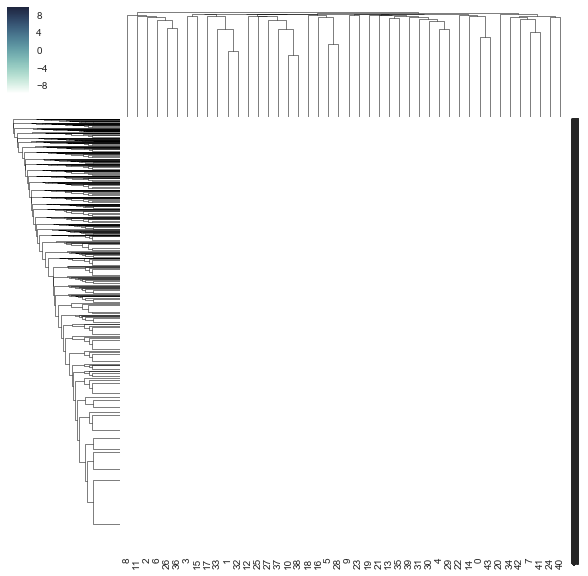

In [17]:
sn.clustermap(X_scaled, cmap=cmap, linewidths=.5)

### Elbow Analysis

In [18]:
cluster_range = range(1,50)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( X_scaled )
    cluster_errors.append( clusters.inertia_ )

In [19]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

In [20]:
clusters_df[0:10]

,cluster_errors,num_clusters
0,316668.000000,1
1,307154.740223,2
2,294027.824843,3
3,282398.544365,4
4,276184.700488,5
5,268760.719942,6
6,263047.189865,7
7,250263.067259,8
8,244610.258555,9
9,231649.859182,10


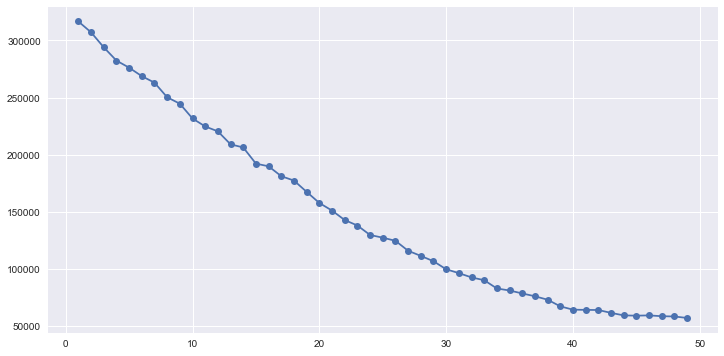

In [21]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

### Elbow Analysis for df_new

In [22]:
X_scaled_new = scaler.fit_transform(df_new)

In [29]:
cluster_range = range(1,50)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( X_scaled_new )
    cluster_errors.append( clusters.inertia_ )

In [30]:
clusters_df_new = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

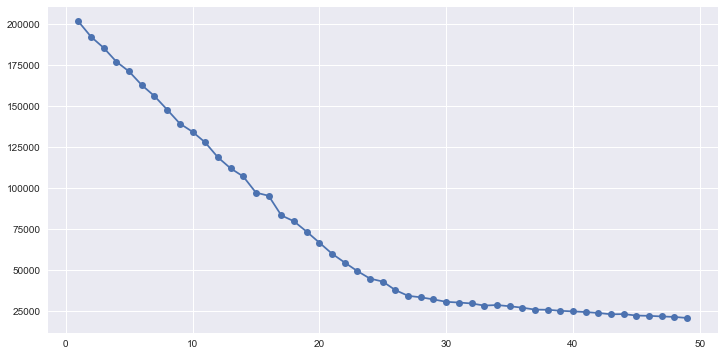

In [31]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df_new.num_clusters, clusters_df_new.cluster_errors, marker = "o" )

### Silhouette analysis for df_new

In [55]:
from sklearn.metrics import silhouette_samples, silhouette_score

('For n_clusters =', 25, 'The average silhouette_score is :', 0.51788280807883813)


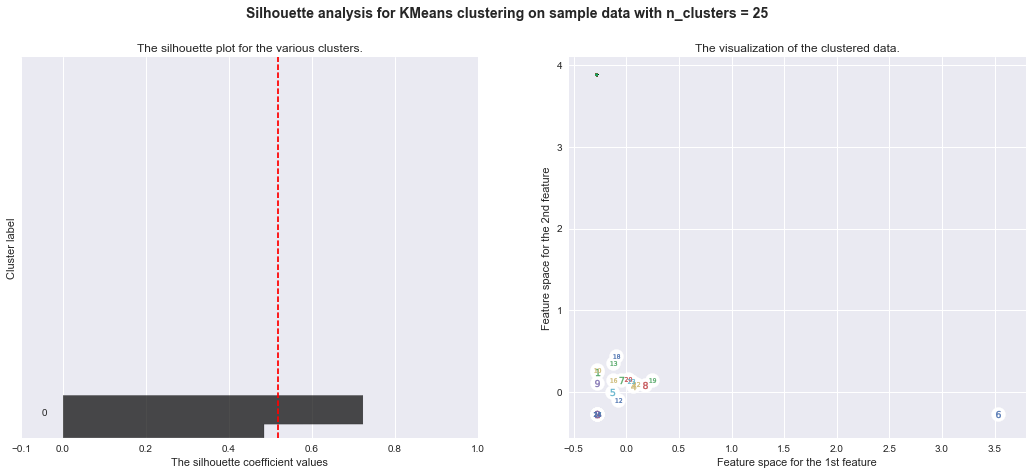

('For n_clusters =', 26, 'The average silhouette_score is :', 0.56327370300061852)


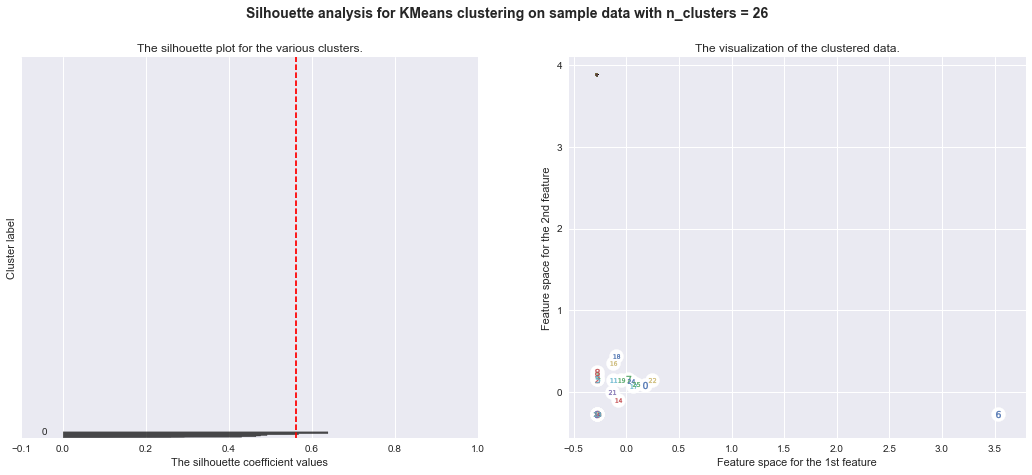

('For n_clusters =', 27, 'The average silhouette_score is :', 0.59873801825384509)


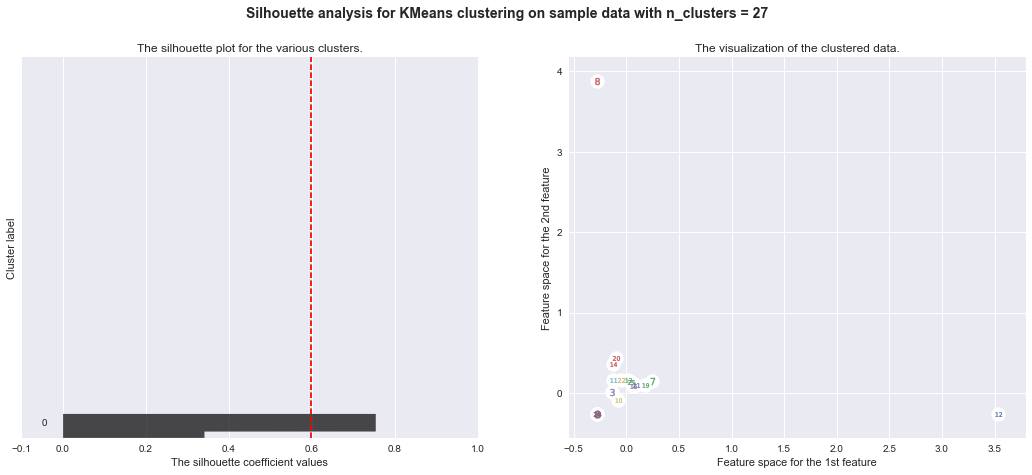

('For n_clusters =', 28, 'The average silhouette_score is :', 0.64037459903907823)


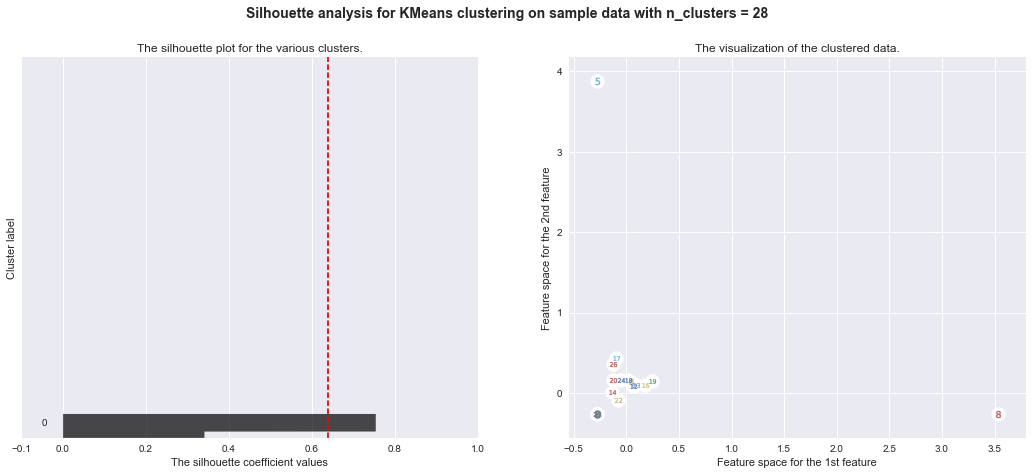

('For n_clusters =', 29, 'The average silhouette_score is :', 0.65525791637906339)


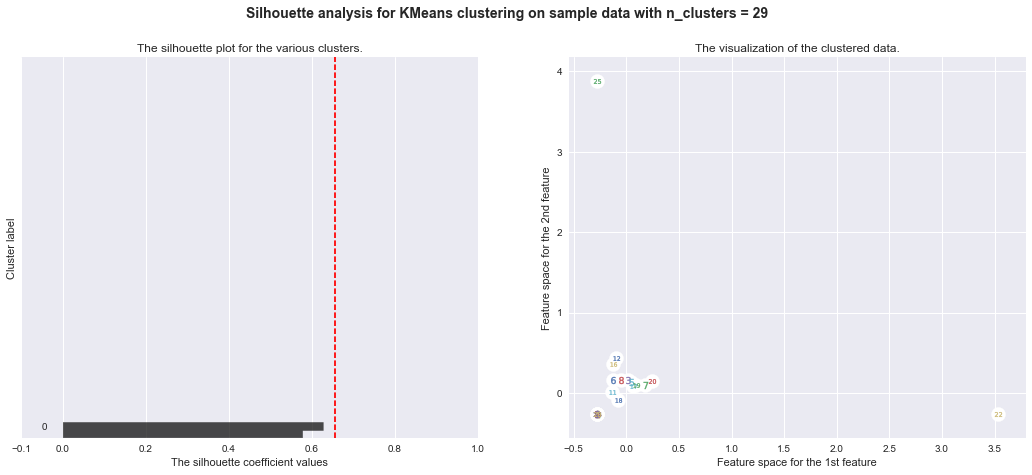

('For n_clusters =', 30, 'The average silhouette_score is :', 0.67136789738368552)


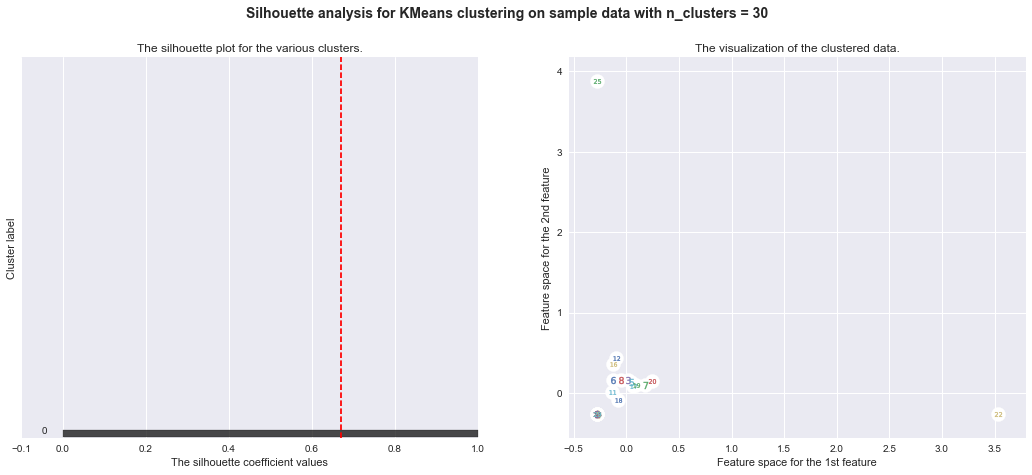

('For n_clusters =', 31, 'The average silhouette_score is :', 0.68335250163127492)


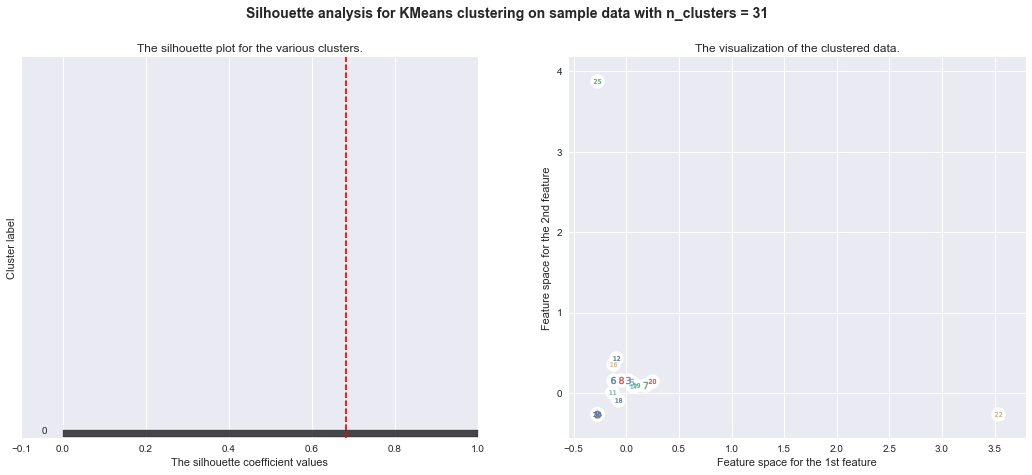

('For n_clusters =', 32, 'The average silhouette_score is :', 0.69651835265970374)


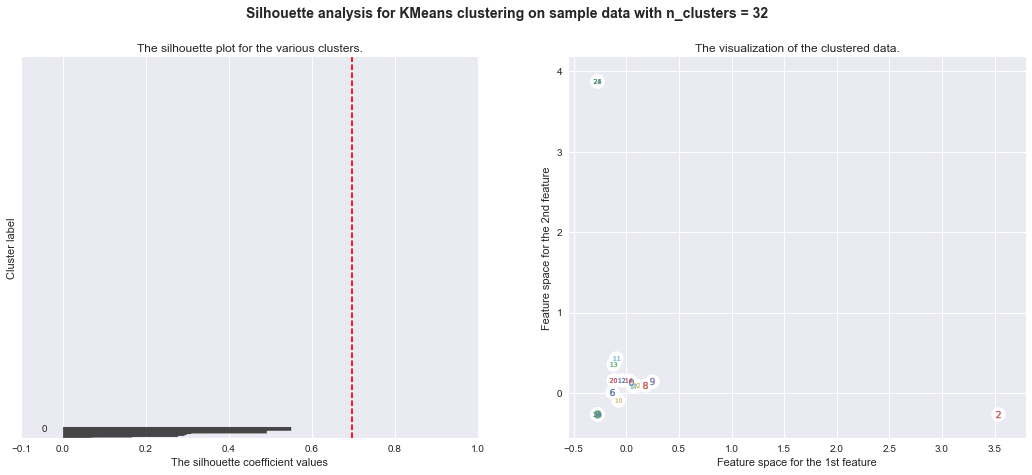

('For n_clusters =', 33, 'The average silhouette_score is :', 0.69504480618888365)


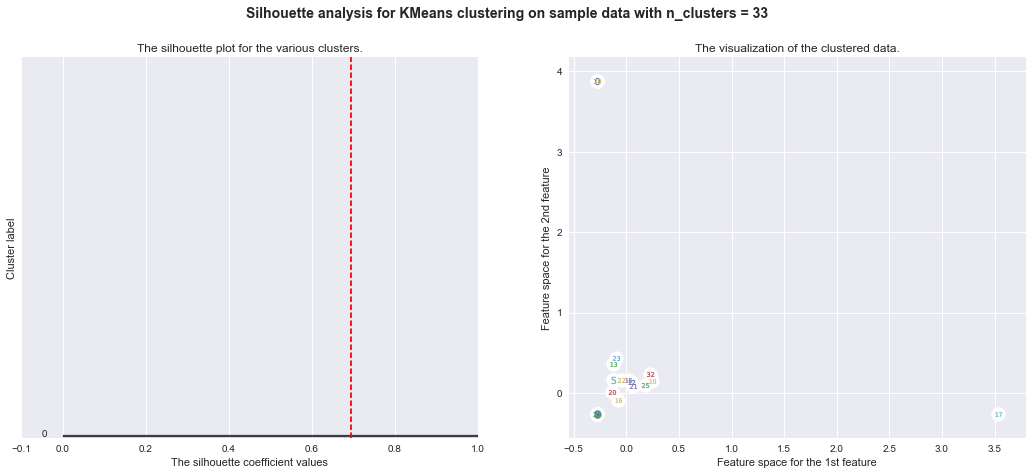

('For n_clusters =', 34, 'The average silhouette_score is :', 0.71560223563874059)


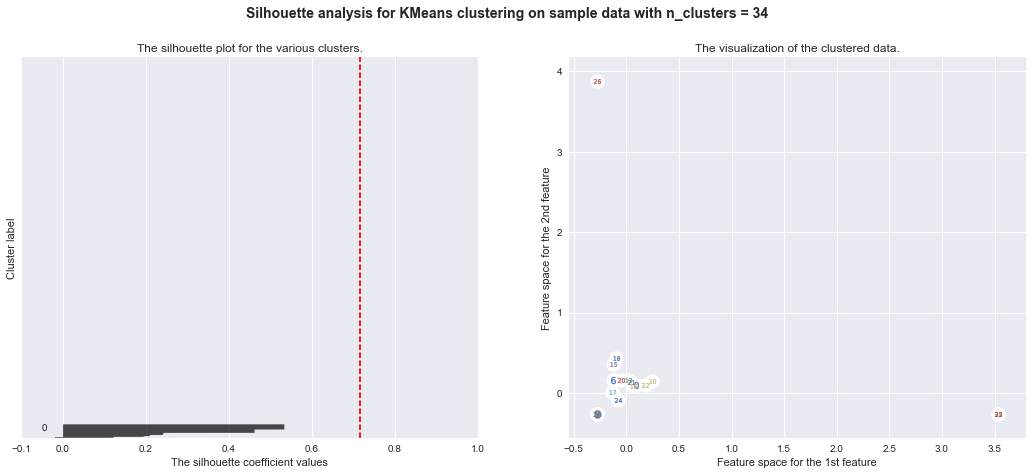

In [60]:
cluster_range = range(25, 35)

for n_clusters in cluster_range:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_scaled_new) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict( X_scaled_new )

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_scaled_new, cluster_labels)
    print("For n_clusters =", n_clusters,
            "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_scaled_new, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                            0, ith_cluster_silhouette_values,
                            facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhoutte score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X_scaled_new[:, 0], X_scaled_new[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                  c=colors)

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1],
                  marker='o', c="white", alpha=1, s=200)

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                    "with n_clusters = %d" % n_clusters),
                   fontsize=14, fontweight='bold')

        plt.show()


### Begin clustering

#### Set cluster number as 3

In [32]:
#kmeans = KMeans(n_clusters=3, random_state=0).fit(df_new)
kmeans = KMeans(n_clusters=3, random_state=3425).fit(df_new)

In [33]:
l0 = [item for item in kmeans.labels_ if item == 0]
l1 = [item for item in kmeans.labels_ if item == 1]
l2 = [item for item in kmeans.labels_ if item == 2]

In [34]:
print len(l0)
print len(l1)
print len(l2)

2997
2328
1872


## Analysis of the clustering result

In [35]:
kmeans.labels_[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [36]:
df_new.index = range(len(df_new))
du.index = range(len(du))

In [37]:
g0, g1, g2 = [], [], []
s0, s1, s2 = 0, 0, 0
t0, t1, t2 = 0, 0, 0
for i in range(len(df_new)):
    if kmeans.labels_[i] == 0:
        g0.append(i)
        s0 += du['carousell_uniques'][i]
        t0 += du['total_uniques'][i]
    elif kmeans.labels_[i] == 1:
        g1.append(i)
        s1 += du['carousell_uniques'][i]
        t1 += du['total_uniques'][i]
    else:
        g2.append(i)
        s2 += du['carousell_uniques'][i]
        t2 += du['total_uniques'][i]
        

In [38]:
print s0,t0, float(s0)/t0  ## It seems that the first group performs best
print s1,t1, float(s1)/t1
print s2,t2, float(s2)/t2
print float(sum(du['carousell_uniques']))/sum(du['total_uniques'])

3491 13298 0.262520679801
4097 32288 0.126889246779
3642 34114 0.106759688105
0.140903387704


In [39]:
df_new_g0 = df_new.loc[g0]
df_new_g1 = df_new.loc[g1]
df_new_g2 = df_new.loc[g2]

In [40]:
df_new_g0.describe()

,brand_Asus,brand_Generic,brand_Huawei,brand_Leagoo,brand_Lenovo,brand_OPPO,brand_Others,brand_Samsung,brand_Sony,brand_Vivo,...,city_10;kajang,city_10;klang,city_10;petaling jaya,city_10;puchong,city_10;seri kembangan,city_10;shah alam,city_12;kota kinabalu,city_13;kuching,city_14;kuala lumpur,city_Others
count,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.0,2997.000000,2997.000000,...,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.0,2997.000000
mean,0.113780,0.114114,0.048048,0.025359,0.283617,0.069069,0.121121,0.0,0.027027,0.050050,...,0.034034,0.048715,0.275275,0.060394,0.024358,0.146813,0.045379,0.017351,0.0,0.190858
std,0.317597,0.318003,0.213903,0.157238,0.450828,0.253614,0.326322,0.0,0.162189,0.218085,...,0.181347,0.215308,0.446727,0.238255,0.154183,0.353979,0.208168,0.130596,0.0,0.393043
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


In [41]:
df_new_g1.describe()

,brand_Asus,brand_Generic,brand_Huawei,brand_Leagoo,brand_Lenovo,brand_OPPO,brand_Others,brand_Samsung,brand_Sony,brand_Vivo,...,city_10;kajang,city_10;klang,city_10;petaling jaya,city_10;puchong,city_10;seri kembangan,city_10;shah alam,city_12;kota kinabalu,city_13;kuching,city_14;kuala lumpur,city_Others
count,2328.0,2328.0,2328.0,2328.0,2328.0,2328.0,2328.0,2328.0,2328.0,2328.0,...,2328.000000,2328.000000,2328.000000,2328.000000,2328.000000,2328.000000,2328.000000,2328.000000,2328.000000,2328.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.023196,0.029639,0.160653,0.040378,0.015464,0.069158,0.036942,0.009450,0.359966,0.145619
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.150558,0.169626,0.367289,0.196886,0.123415,0.253777,0.188659,0.096772,0.480093,0.352799
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
df_new_g2.describe()

,brand_Asus,brand_Generic,brand_Huawei,brand_Leagoo,brand_Lenovo,brand_OPPO,brand_Others,brand_Samsung,brand_Sony,brand_Vivo,...,city_10;kajang,city_10;klang,city_10;petaling jaya,city_10;puchong,city_10;seri kembangan,city_10;shah alam,city_12;kota kinabalu,city_13;kuching,city_14;kuala lumpur,city_Others
count,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.0,1872.000000,1872.000000,...,1872.0,1872.0,1872.0,1872.0,1872.0,1872.0,1872.0,1872.0,1872.0,1872.0
mean,0.103098,0.057158,0.075321,0.041667,0.299679,0.080662,0.135684,0.0,0.053953,0.059295,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
std,0.304168,0.232207,0.263978,0.199880,0.458240,0.272389,0.342544,0.0,0.225985,0.236239,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Sort by carousell_uniques for each group and compare the structure of three groups

In [43]:
df0 = du.ix[g0]
df1 = du.ix[g1]
df2 = du.ix[g2]

In [44]:
df0g = df0.groupby(['brand', 'city'])['carousell_uniques', 'total_uniques'].sum()
df0g.sort('carousell_uniques', ascending = False)

/Users/carol/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,,carousell_uniques,total_uniques
brand,city,,
Lenovo,10;petaling jaya,394,3532
Generic,10;petaling jaya,195,1563
Lenovo,10;shah alam,173,1076
Asus,10;petaling jaya,115,870
Xiaomi,10;petaling jaya,101,362
Lenovo,10;puchong,78,333
OPPO,10;petaling jaya,76,349
Generic,10;shah alam,65,435
Asus,10;shah alam,58,296


In [45]:
df1g = df1.groupby(['brand', 'city'])['carousell_uniques', 'total_uniques'].sum()
df1g.sort('carousell_uniques', ascending = False)

/Users/carol/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


carousell_uniques  total_uniques
brand   city                                                          
Samsung 14;kuala lumpur                            2187          22901
        10;petaling jaya                            632           4792
        10;shah alam                                213           1406
        10;puchong                                  121            553
        10;batu caves                               112            458
        12;kota kinabalu                            101            415
        10;klang                                     76            309
        10;kajang                                    66            227
        01;johor bahru                               53            190
        06;kuantan                                   43            112
        05;seremban                                  38            108
        10;seri kembangan                            36             72
        10;jalan tasik selatan                       33             60
        10;bandar utama                              32             66
        07;lebuh downing                             25             55
        08;ipoh                                      24             39
        13;kuching                                   23             76
        04;melaka                                    22             64
        10;ampang                                    20             30
        10;jalan sp 20                               19             34
        11;kuala terengganu                          16             29
        03;kota bharu                                16             26
        02;alor setar                                15             20
        05;nilai                                     14             23
        13;bintulu                                   14             32
        02;sungai petani                             13             14
        10;subang jaya - usj 19 - 24                 12             32
        13;miri                                      12             16
        07;bayan lepas                                8             12
        10;cheras                                     7             13
...                                                 ...            ...
        07;lebuh tunku kudin 2                        2              2
        01;pontian                                    2              2
        01;ulu tiram                                  2              2
        02;changloon                                  2              2
        04;jalan teratai                              2              2
        09;kangar                                     1              1
        11;dungun                                     1              1
        11;alor gali                                  1              1
        11;bukit payong                               1              2
        12;sandakan                                   1              1
        02;kampung pulau chengai                      1              1
        02;kuah                                       1              1
        01;pasir gudang                               1              1
        01;kulai                                      1              1
        10;subang jaya - usj 5 - 8                    1              1
        03;bakat                                      1              1
        10;subang jaya - usj 12 - 18                  1              1
        08;taiping                                    1              3
        10;rawang                                     1              1
        06;bentong                                    1              1
        06;kampung baru                               1              1
        06;kuala pahang                               1              1
        06;temerloh                                   1              1
        07;george town                                1       

In [46]:
df2g = df2.groupby(['brand', 'city'])['carousell_uniques', 'total_uniques'].sum()
df2g.sort('carousell_uniques', ascending = False)

/Users/carol/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,,carousell_uniques,total_uniques
brand,city,,
Lenovo,14;kuala lumpur,1303,15688
Generic,14;kuala lumpur,481,5639
Asus,14;kuala lumpur,365,4225
Xiaomi,14;kuala lumpur,303,1430
OPPO,14;kuala lumpur,251,1900
Vivo,14;kuala lumpur,178,1576
Huawei,14;kuala lumpur,162,772
Sony,14;kuala lumpur,115,508
Leagoo,14;kuala lumpur,96,520
